
<img width= "300" src="https://cdn.discordapp.com/attachments/392490318798389248/945695517004951633/jeanettes_fireart.png" alt="US Fires Logo">

# Sound The Alarm: Final Report

### by Lori Ainslie, Jeanette Schulz, Kristine Cabanela, and Sophia Stewart 

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Group-made functions
from wrangle import *

# Blocking Warning Boxes
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

# Recolor charts to be fire-y!
#sns.set_palette(palette='rocket')
sns.set_theme(palette='autumn', style='white')

---
# Project Goal

- With over 2.16 million recorded wildfires and over 164 million acres burned, human intervention is needed to reduce the devastation and destruction caused by wildfires. Our overall goal is to see how US wildfires have changed over the years to promote active solutions to reduce their impact.

---
# Acquire
---

In [2]:
# Acquiring the data from our wrangle
df = acquire_fires()
df.head(2)

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005 0:00,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005 0:00,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004 0:00,133,845.0,Natural,Natural,NaN,5/12/2004 0:00,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County


---
# Prepare
---

We started by preparing the data as a team. All decisions made were as a group to ensure our wrangled data would benefit each of our future exploration needs.

We started by dropping columns with large amount of null values:

- LOCAL_FIRE_REPORT_ID
- LOCAL_INCIDENT_ID
- FIRE_CODE
- FIRE_NAME
- ICS_209_PLUS_INCIDENT_JOIN_ID
- ICS_209_PLUS_COMPLEX_JOIN_ID
- MTBS_ID
- MTBS_FIRE_NAME
- COMPLEX_NAME
- DISCOVERY_TIME
- NWCG_CAUSE_AGE_CATEGORY
- CONT_TIME
- COUNTY
- FIPS_CODE
- FIPS_NAME

Next, this data set came with a lot of columns that had additional information. This included columns such as the `NWCG_REPORTING_AGENCY` (superfluous information) and `DISCOVERY_DOY` (unnecessary if we keep `DISCOVERY_DATE`). Thus, we dropped these additonal columns as follows:  

- FOD_ID
- FPA_ID
- SOURCE_SYSTEM_TYPE
- SOURCE_SYSTEM
- NWCG_REPORTING_AGENCY
- NWCG_REPORTING_UNIT_ID
- NWCG_REPORTING_UNIT_NAME
- SOURCE_REPORTING_UNIT
- SOURCE_REPORTING_UNIT_NAME
- FIRE_SIZE_CLASS
- NWCG_CAUSE_CLASSIFICATION
- CONT_DOY
- DISCOVERY_DOY
- OWNER_DESCR

Now that we had the columns we wanted to keep, it was time to make sure they were the correct dtype and format. We made sure `DISCOVERY_DATE` and `CONT_DATE` were datetime dtypes. In addition, we renamed `nwcg_general_cause` and `cont_date` to `general_cause` and `containment_date`. We made all the column names lowercase so they would be easier to code.   

Finally, we conducted some feature engineering and created columns based on existing features to aid with exploration. These included:

- state_size
- region (West, Midwest, Southwest, Northeast, Southeast)
- region size
- fire_size_cat ('large', 5,000 acres or larger, 'small', less than 5,000 acres)

Here is what our cleaned dataframe looked like:

In [3]:
df = wrangle_fires()
df.head(2)

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat
0,2005,2005-02-02,Power generation/transmission/distribution,2005-02-02,0.10,40.036944,-121.005833,CA,101676000.0,west,1.008831e+09,small
1,2004,2004-05-12,Natural,2004-05-12,0.25,38.933056,-120.404444,CA,101676000.0,west,1.008831e+09,small


In [4]:
df.shape

(2166753, 12)

#### Our dataset has a little over 2M observations and 12 variables.

---
# Explore
---

## Overview of the data

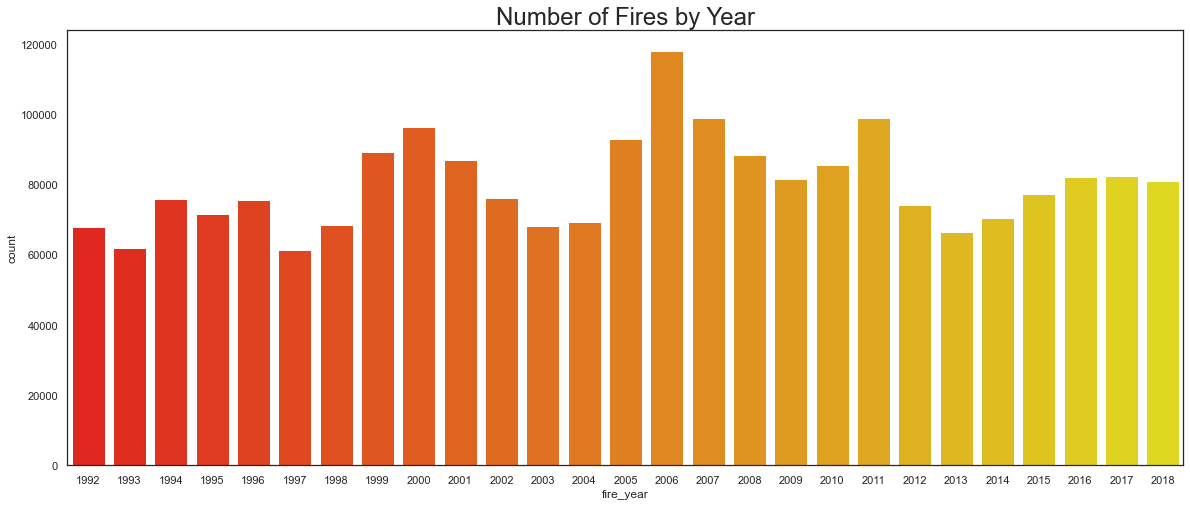

In [5]:
# plot number of fires by year
plt.figure(figsize = (20,8))
sns.countplot(data= df, x= 'fire_year', palette='autumn')
plt.legend([],[], frameon=False)
plt.title('Number of Fires by Year', fontdict={'fontsize': 24});

#### The average number of wildfires appears to be just a bit higher in recent years than it was in the early 1990s. The number is lower than it was at the beginning of the 21st century and in 2006 which went on record as one of the hottest years in the U.S.

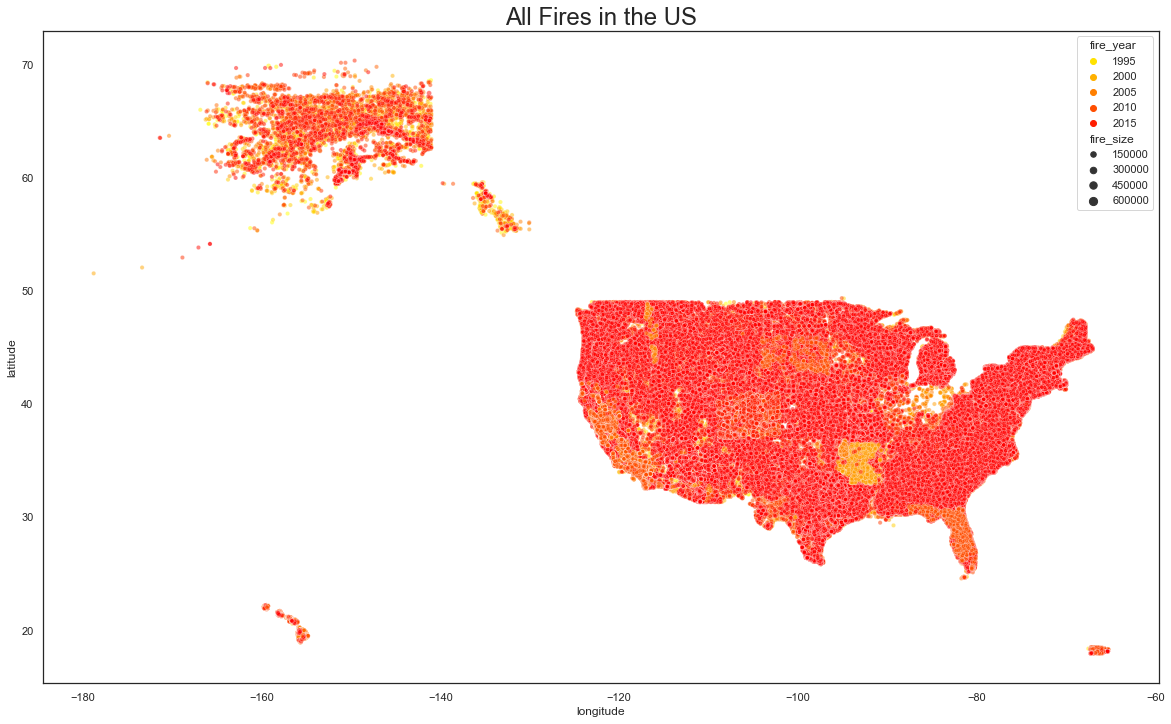

In [6]:
# plot fires across us
plt.figure(figsize=(20,12))
sns.scatterplot(x='longitude', y='latitude', data= df, size='fire_size', hue='fire_year', alpha=0.5, palette='autumn_r');
plt.title('All Fires in the US', fontdict={'fontsize': 24});

#### When we look at all of the fires in our dataset geographically, we can see that fires occur throughout the United States, with many states having a higher concentration of more recent fires (dark orange points). However, there are some states, such as Missouri and Florida, which have a higher concentration of older fires (lighter-colored points). Additionally, in Ohio there appear to be fewer fires as there is a decent amount of whitespace in that area. However, upon further investigation it seems this whitespace is caused by certain regions of Ohio being more fire-prone than other regions in the same state.

### Let's dive deeper into the data by looking at how the number of fires and size of fires have changed over the years.

---

## Number of Wildfires

### Has the number of wildfires changed over time? Are they increasing or decreasing?

In [7]:
# First, create a time-series dataframe
time_df = df.set_index('discovery_date').sort_index()

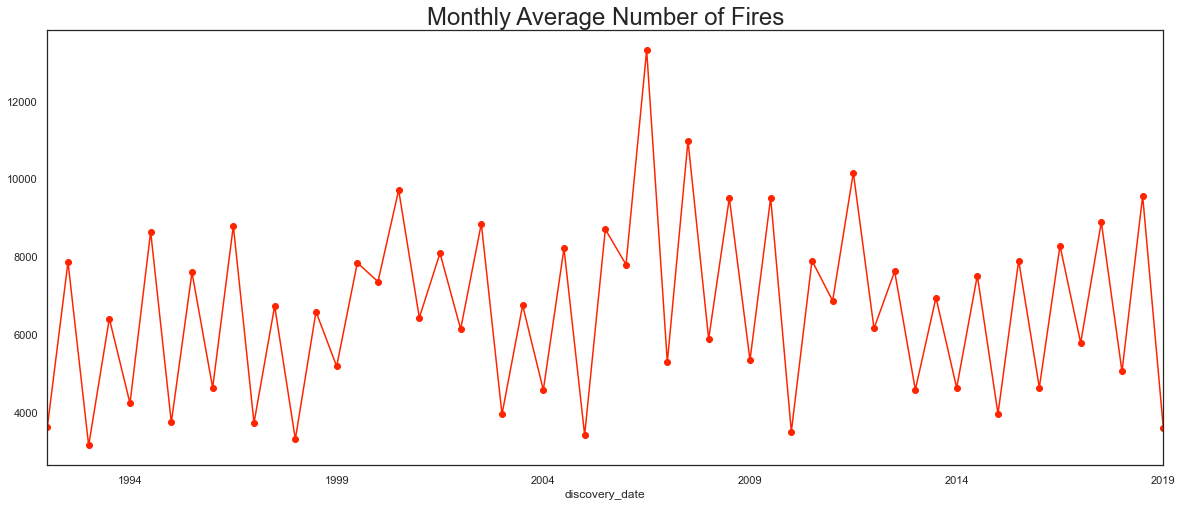

In [8]:
# plot number of fires per 1-month period over the years
num_fires_by_month = time_df.resample('M').fire_year.count()

plt.figure(figsize = (20,8))
num_fires_by_month.resample('6M').mean().plot(marker='o')
plt.title('Monthly Average Number of Fires', fontdict={'fontsize': 24});

#### When looking at the average number of fires by month, there is no clear trend outside of the 2005 - 2006 timeframe which had experienced a significant number of wildfires. 

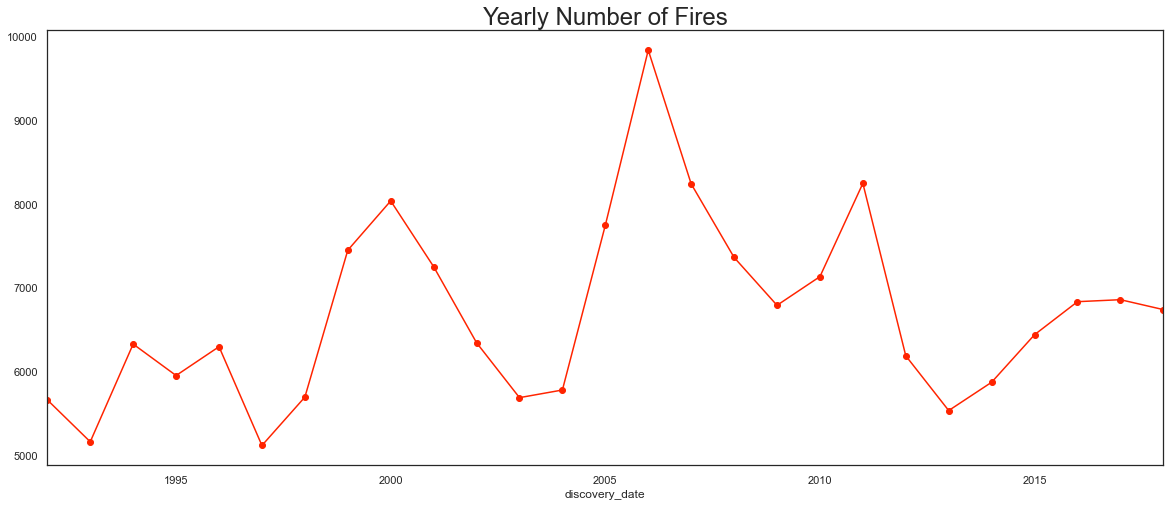

In [9]:
# let's change the timeframe to number of fires by year
plt.figure(figsize = (20,8))
num_fires_by_month.resample('Y').mean().plot(marker='o')
plt.title('Yearly Number of Fires', fontdict={'fontsize': 24});

#### In this graph we see a downward trend in the number of fires since 2005 - 2006 timeframe which had experienced a significant number of wildfires.

### Is the average number of wildfires higher from one month to the next?

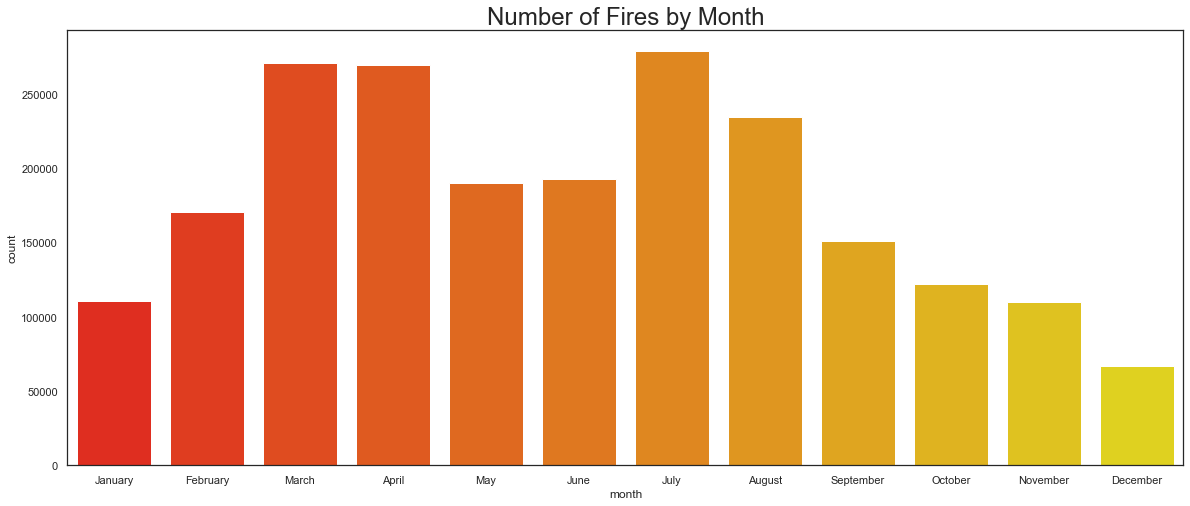

In [10]:
# plot number of fires by month
time_df['month'] = time_df.index.month_name()

plt.figure(figsize = (20,8))
sns.countplot(data= time_df, x= 'month', palette='autumn')
plt.legend([],[], frameon=False)
plt.title('Number of Fires by Month', fontdict={'fontsize': 24});

### What about by day of the week?

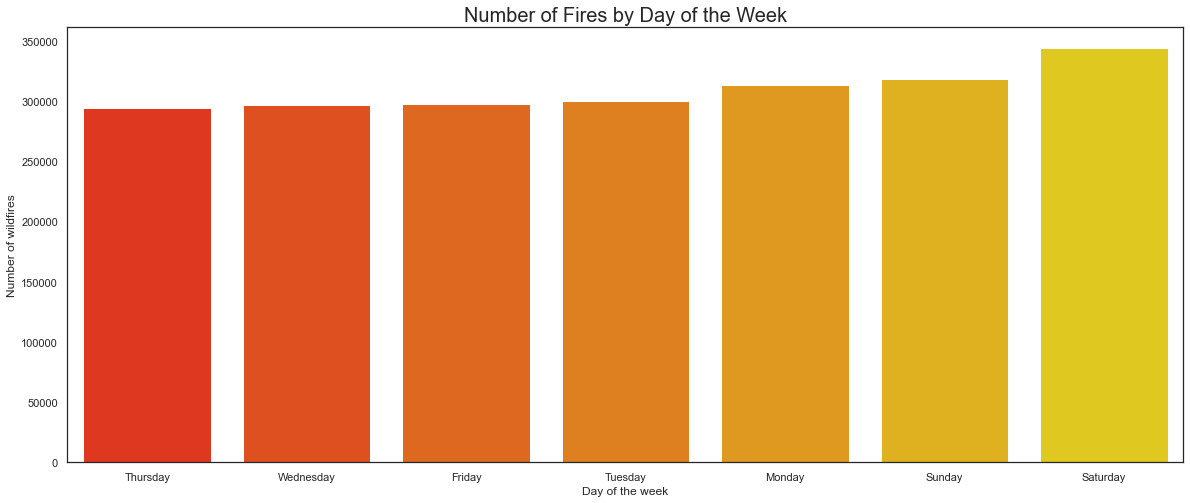

In [13]:
# add new column for day of the week
df['day_of_week']= df['discovery_date'].dt.day_name()

# create dataframe for the count of fires occuring by day of the week
day_of_week = df.groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')

# plot the number of fires per day of week to visualize
plt.figure(figsize=(20,8))
g = sns.barplot(data = day_of_week, y = 'count', x = 'day_of_week', palette='autumn')
plt.xlabel('Day of the week')
plt.ylabel('Number of wildfires')
g.axes.set_title('Number of Fires by Day of the Week',fontsize=20);

#### As the hottest months of the year, it's not surprising to see July and August have some of the highest numbers of wildfires. It is a little surprising to see that March and April also have more wildfires than other months. 

---

## Wildfire Size

### Has average fire size changed over the years?

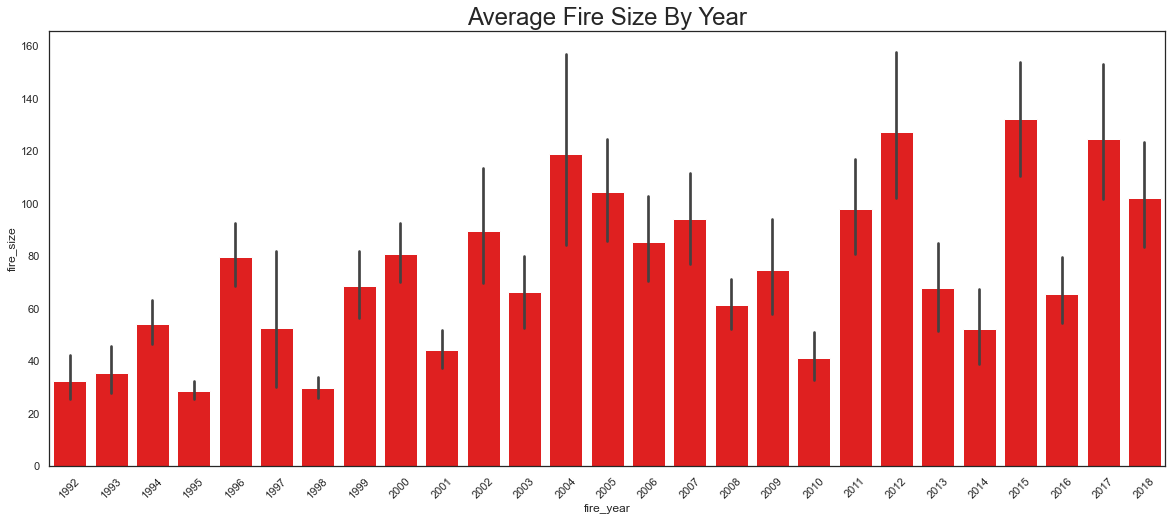

In [14]:
# fire size over span of years
plt.figure(figsize = (20,8))
firesizeyear=sns.barplot(x="fire_year", y="fire_size", data= df ,color='red')
firesizeyear.set_title('Average Fire Size By Year', fontdict={'fontsize': 24})
firesizeyear.set_xticklabels(firesizeyear.get_xticklabels(),rotation=45);

#### The chart above shows a visual of the distribution of average fire size over each recorded year. Although fire size changes from highs and lows as time progresses, the overall size after 2000 seems to have an upward trajectory.

### What about total acreage burned over the years?

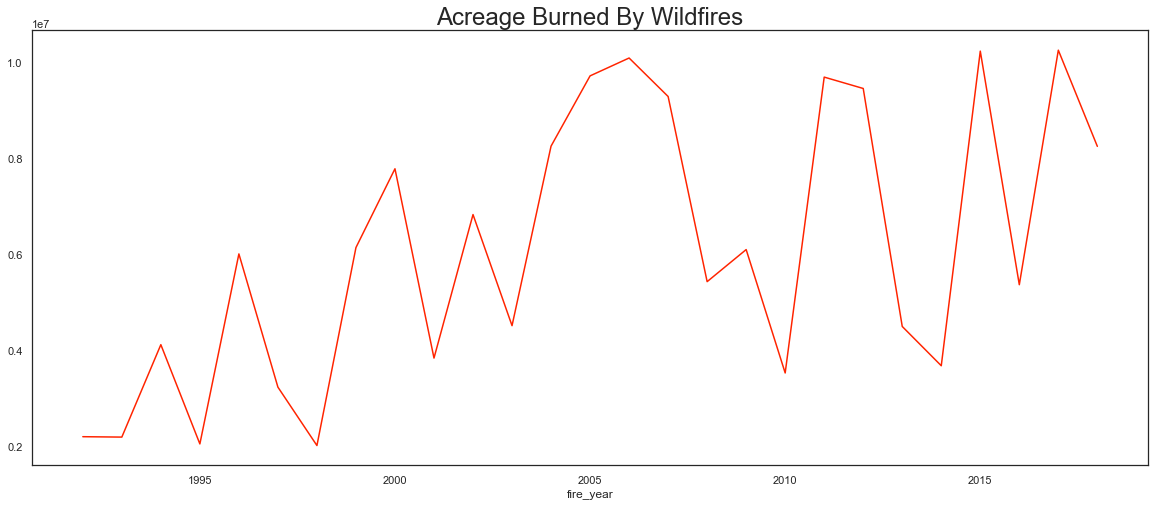

In [15]:
# plot acreage burned by wildfires over the years
plt.figure(figsize = (20,8))
df.groupby('fire_year').fire_size.sum().plot()
plt.title('Acreage Burned By Wildfires', fontdict={'fontsize': 24});

#### This chart makes it more clear that that the total acreage burned by wildfires is on an upward trend since 1992. This tells us that the wildfires that do occur may be more difficult to contain and are more disastrous. 

### Are there any trends we can identify with how the number of wildfires vs size of wildfires has changed over the years?

In [16]:
# create dataframe of total sum of fire_size by year and divide by 1000 for graphing readability
yearly_fire_count = df.groupby('fire_year').fire_size.count().reset_index()
yearly_fire_count.fire_size = round(yearly_fire_count.fire_size / 1_000)

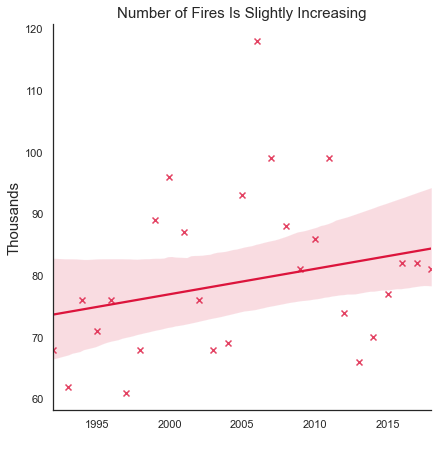

In [17]:
# plot trend of fire count by year
sns.set_style('white')

sns.lmplot(x='fire_year', y='fire_size', data=yearly_fire_count, height=6, markers='x', seed=321, robust=True, scatter_kws={'color': 'crimson'}, line_kws={'color': 'crimson'})
plt.title('Number of Fires Is Slightly Increasing', fontsize=15)
plt.ylabel('Thousands', fontsize=15)
plt.xlabel(' ');

In [18]:
# create dataframe of total sum of fire_size by year and divide by 1,000,000 for graphing readability
yearly_mean_fire_size = df.groupby('fire_year').fire_size.sum().reset_index()
yearly_mean_fire_size.fire_size = round((yearly_mean_fire_size.fire_size / 1_000_000), 2)

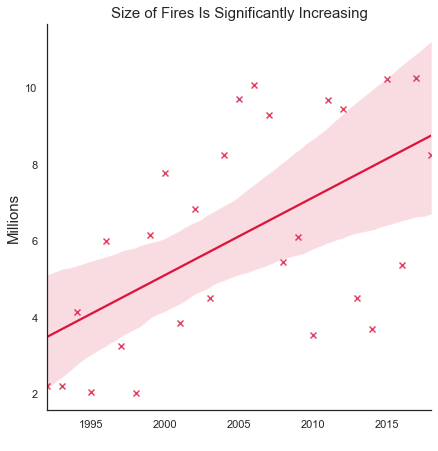

In [19]:
# plot trend of fire size by year
sns.lmplot(x='fire_year', y='fire_size', data=yearly_mean_fire_size, height=6, markers='x', seed=321, robust=True, scatter_kws={'color': 'crimson'}, line_kws={'color': 'crimson'})
plt.title('Size of Fires Is Significantly Increasing', fontsize=15)
plt.ylabel('Millions', fontsize=15)
plt.xlabel(' ');

#### While the number of wildfires is only slightly increasing, we see a more significant upward trend in the size of wildfires.

### The fact that wildfire size is increasing so dramatically is intriguing. Let's explore this a little further looking specifically into large vs small fires.

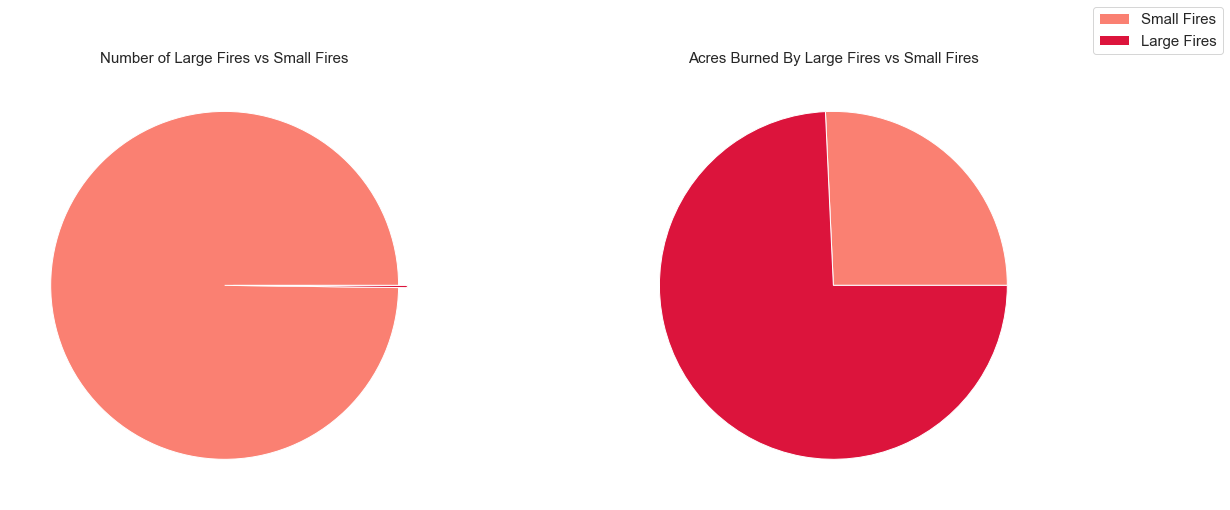

In [20]:
# create pie chart for number of large vs small fires and area burned by each
labels=['Small Fires', 'Large Fires']
num_sm_fires = df[df.fire_size_cat == 'small'].shape[0]
num_lg_fires = df[df.fire_size_cat == 'large'].shape[0]
acres_sm_fires = df[df.fire_size_cat == 'small'].fire_size.sum()
acres_lg_fires = df[df.fire_size_cat == 'large'].fire_size.sum()

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.pie(x = [num_sm_fires, num_lg_fires], colors = ['salmon', 'crimson'], textprops = {'size':14}, explode=(0,.05))
plt.figlegend(labels, fontsize =15)
plt.title('Number of Large Fires vs Small Fires', size=15)

plt.subplot(122)
plt.pie(x = [acres_sm_fires, acres_lg_fires], colors = ['salmon', 'crimson'], textprops = {'size':14})
plt.title('Acres Burned By Large Fires vs Small Fires', size=15)
plt.show()

#### It appears that the number of large fires is only a very small proportion of our dataset yet accounts for roughly 75% of total area burned.  

### Has the number of large vs small wildfires changed over time?

In [21]:
# create dataframe of number of small fires by year and divide by 1000 for graphing readability
sm_fires_by_year = df[df.fire_size_cat == 'small'].groupby('fire_year').fire_size.count().to_frame()\
                                                .rename(columns={'fire_size':'fire_count'})
sm_fires_by_year.fire_count = round(sm_fires_by_year.fire_count / 1000)

# create dataframe of number of large fires by year
lg_fires_by_year = df[df.fire_size_cat == 'large'].groupby('fire_year').fire_size.count()

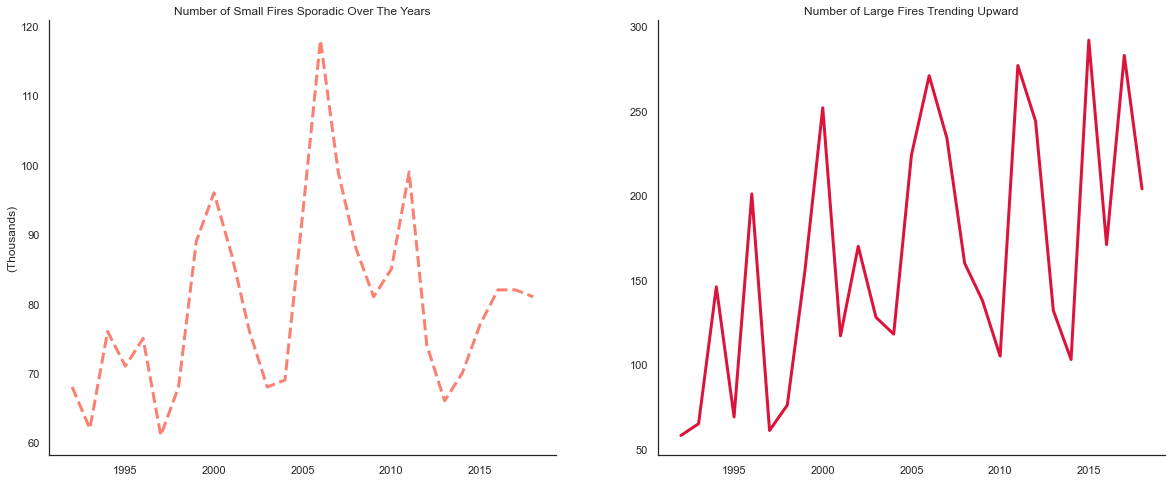

In [22]:
plt.figure(figsize = (20,8))
plt.subplot(121)
plt.plot(sm_fires_by_year, color='salmon', ls='--', lw=3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Number of Small Fires Sporadic Over The Years')
plt.ylabel('(Thousands)')

plt.subplot(122)
plt.plot(lg_fires_by_year, color='crimson', lw=3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Number of Large Fires Trending Upward')
plt.xlabel(' ');

#### It appears the number of large wildfires is increasing. The number of small wildfires has trended down from 2006 timeframe but if we look at the last few years since about 2013, it is trending up.

### Now that we have a bit of insight on the size of wildfires, let's take a look at some of their causes.

---

## Causes

### What are the top causes of wildfires?

In [23]:
# Get the top five causes by year through value counts
top_causes_of_wildfires = df.general_cause.value_counts().head()

# create a new dataframe that groups by year and gets a count by year of the top 4 causes (exclude unknown/not specified) for wildfires
num_causes_by_year = df[df.general_cause.isin(top_causes_of_wildfires[1:].index.to_list())]\
.groupby(['fire_year', 'general_cause']).count().reset_index().iloc[:, 0:3]\
.rename(columns={'discovery_date':'num_occurrences'})

# check top causes
top_causes_of_wildfires

Missing data/not specified/undetermined    547438
Debris and open burning                    507219
Natural                                    312807
Arson/incendiarism                         310320
Equipment and vehicle use                  175824
Name: general_cause, dtype: int64

#### It looks like a quarter of our data does not have the cause specified. Of those that do have the cause listed, it looks like human action is one of the main causes.

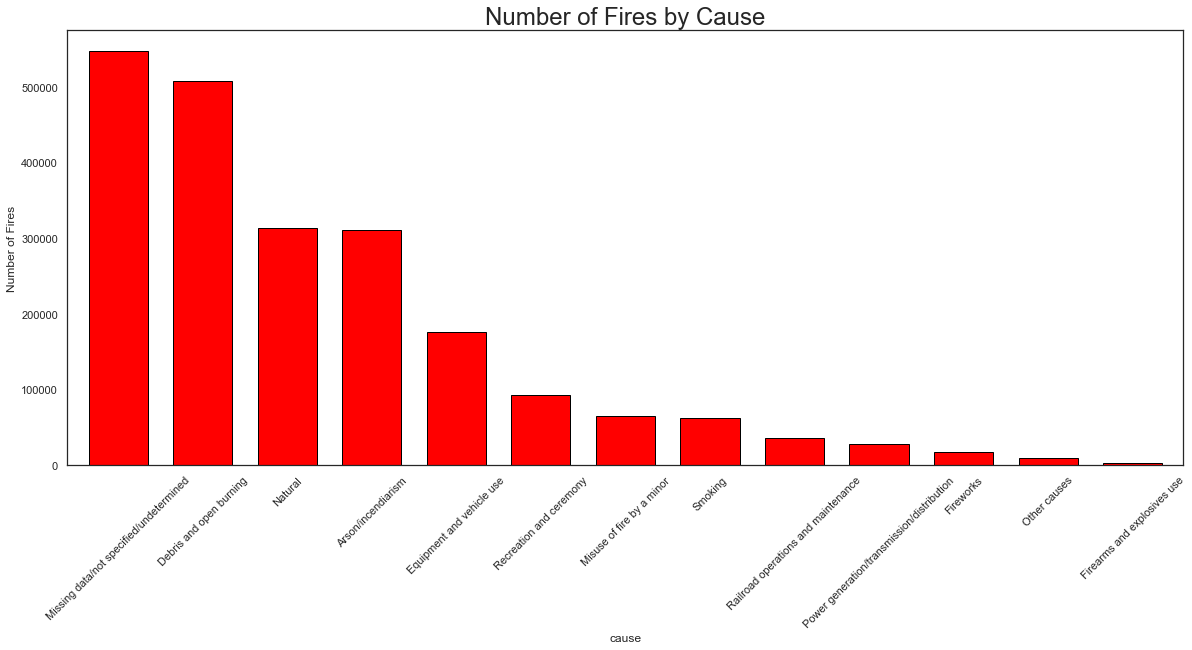

In [24]:
# plot number of wildfires by cause
fig = plt.figure(figsize=(20, 8))
ax = df.general_cause.value_counts().plot.bar(width=.7, ec='black', color='red')
ax.set( ylabel='Number of Fires', xlabel='cause')
plt.xticks(rotation=45)
ax.set_title('Number of Fires by Cause',fontsize=24);

#### The chart above shows a visual of the distribution of fires categorized by cause from largest to smallest number of fires in each category. Aside from missing/undertermined causes, Debris and open burning, Natural, Arson are the top three causes for most wildfires.  Human interaction is prevalent however in majority of causes altogether.

*Largest cause of wildfires is "missing data/not specified/undetermined"*

### Have the top causes of wildfires changed over time?

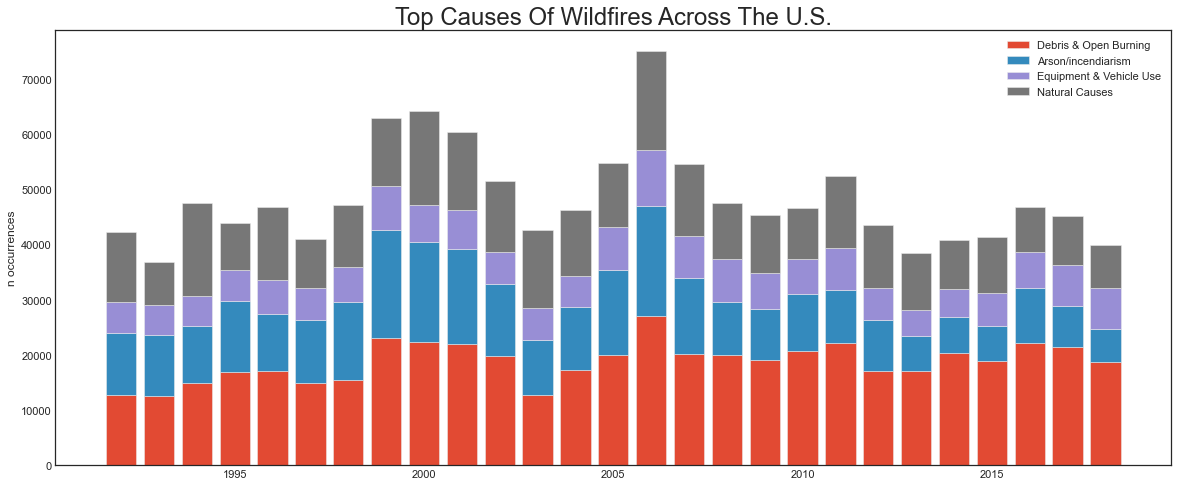

In [25]:
# Lori
# separate each of the top four causes into their own dataframe
natural = num_causes_by_year[num_causes_by_year.general_cause == "Natural"]
arson = num_causes_by_year[num_causes_by_year.general_cause == "Arson/incendiarism"]
debris = num_causes_by_year[num_causes_by_year.general_cause == "Debris and open burning"]
equipment = num_causes_by_year[num_causes_by_year.general_cause == "Equipment and vehicle use"]

# set the year column as the index for each of the dataframes
natural = natural.set_index("fire_year")
arson = arson.set_index("fire_year")
equipment = equipment.set_index("fire_year")
debris = debris.set_index("fire_year")

# create the subplots
plt.style.use('ggplot')
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize = (20,8))

labels = arson.index
# plot the number of occurrences for each cause by year
ax.bar(labels, debris.num_occurrences, label="Debris & Open Burning")
ax.bar(labels, arson.num_occurrences, label="Arson/incendiarism", bottom=debris.num_occurrences)
ax.bar(labels, equipment.num_occurrences, label="Equipment & Vehicle Use", bottom=debris.num_occurrences + arson.num_occurrences)
ax.bar(labels, natural.num_occurrences, label="Natural Causes", bottom=debris.num_occurrences + arson.num_occurrences + equipment.num_occurrences)

ax.legend()
ax.set_ylabel("n occurrences")
ax.set_title("Top Causes Of Wildfires Across The U.S.", fontdict={'fontsize': 24});

#### From the graph, we see that the largest proportion of wildfire causes is from debris and open burning. It almost appears to have a slight upward trend over the years. Arson & incendiarism as a cause appears to be decreasing. The number of fires caused by equipment and vehicle use has stayed pretty steady while the number caused by natural causes appears to have slightly decreased.

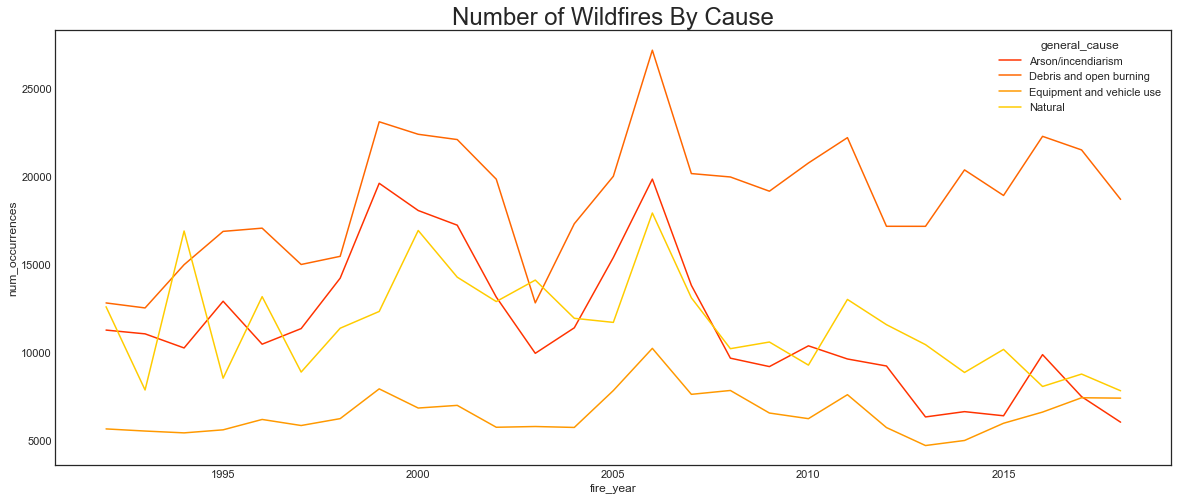

In [26]:
# plot trends over the years for the top four causes of wildfires
plt.figure(figsize = (20,8))
sns.lineplot(data=num_causes_by_year, x='fire_year', y='num_occurrences', hue='general_cause', palette='autumn')
plt.title('Number of Wildfires By Cause', fontdict={'fontsize': 24});

#### Using a line chart we can see the trends a little more clearly. This graph shows that the number of wildfires caused by debris and open burning has been increasing since 1992. Other than the number of fires caused by equipment and vehicle use, which has stayed pretty steady over the years, the number of fires for the other top two causes, arson/incendiarism and natural causes, have decreased.

### Do many of the wildfires caused by debris/open burning happen on the weekend?

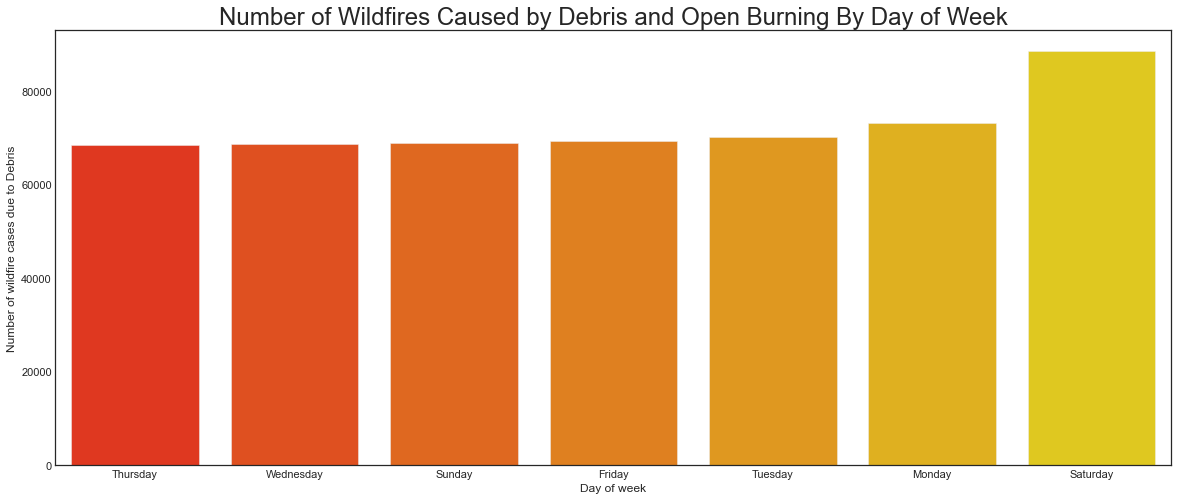

In [27]:
# create dataframe for number of fires during each day of the week 
# that was caused specifically by "debris and open burning"
debris_over_weekday = df[df['general_cause'] == 'Debris and open burning'].groupby(['day_of_week']).size().reset_index(name = 'count').sort_values('count')

# plot number of fires caused by debris and open burning over days of the week
plt.figure(figsize=(20,8))
g = sns.barplot(data = debris_over_weekday, y = 'count', x = 'day_of_week', palette='autumn')
plt.xlabel('Day of week')
plt.ylabel('Number of wildfire cases due to Debris')
g.axes.set_title('Number of Wildfires Caused by Debris and Open Burning By Day of Week',fontsize=24);

#### As hypothesized, weekends, specifically Saturday, are more likely to have wildfires occur likely because of camping and other activities that involve fires. Furthermore, people are likely to do more Debris and open burning on Saturdays.

In [30]:
# Dropping data that has nulls in containment_date
clean_df = df[df.containment_date.isnull() == False]

# Do humans cause the majority of wildfires?
human_cause = ['Debris and open burning', 
               'Arson/incendiarism', 
               'Equipment and vehicle use', 
               'Recreation and ceremony', 
               'Misuse of fire by a minor', 
               'Smoking', 
               'Power generation/transmission/distribution', 
               'Fireworks', 
               'Railroad operations and maintenance', 
               'Firearms and explosives use']                            
                                       
other_cause = ['Missing data/not specified/undetermined', 
               'Natural', 
               'Other causes']
human_fires = 0
for cause in human_cause:
    human_fires += clean_df[clean_df.general_cause == cause ].shape[0]

other_fires = 0
for cause in other_cause:
    other_fires += clean_df[clean_df.general_cause == cause ].shape[0]

print('Total Human Caused Fires:', human_fires)
print('Total Other Caused Fires:', other_fires)
print('Percentage of Fires Caused By Humans:', round(human_fires / (human_fires + other_fires), 2))
print('Percentage of Fires Caused By Other:', round(other_fires / (human_fires + other_fires), 2))

Total Human Caused Fires: 748911
Total Other Caused Fires: 563261
Percentage of Fires Caused By Humans: 0.57
Percentage of Fires Caused By Other: 0.43


#### Many of the fires in our dataset have their `general_cause` labeled as 'Missing data/not specified/undetermined'. Despite this, the data clearly shows that humans are the main cause of wildfires, not nature. While climate change plays a big role in make these fires worse, the cause of the fire is still in the hands of humans. 

---

## Wildfires By Region

### Next we will look at wildfire statistics by region. The regions we've included are:
- **West:** WA, OR, CA, NV, UT, CO, WY, ID, MT, AK, HI
- **Southwest:** AZ, NM, OK, TX
- **Midwest:** ND, SD, NE, KS, MO, IA, IL, MN, WI, IN, OH, MI
- **Southeast:** MD, AR, LA, MS, AL, TN, KY, FL, PR, GA, SC, NC, VA, DC, WV, DE
- **Northeast:** PA, NJ, CT, RI, MA, NH, ME, VT, NY

### Has the total area burned in each region changed over the years?

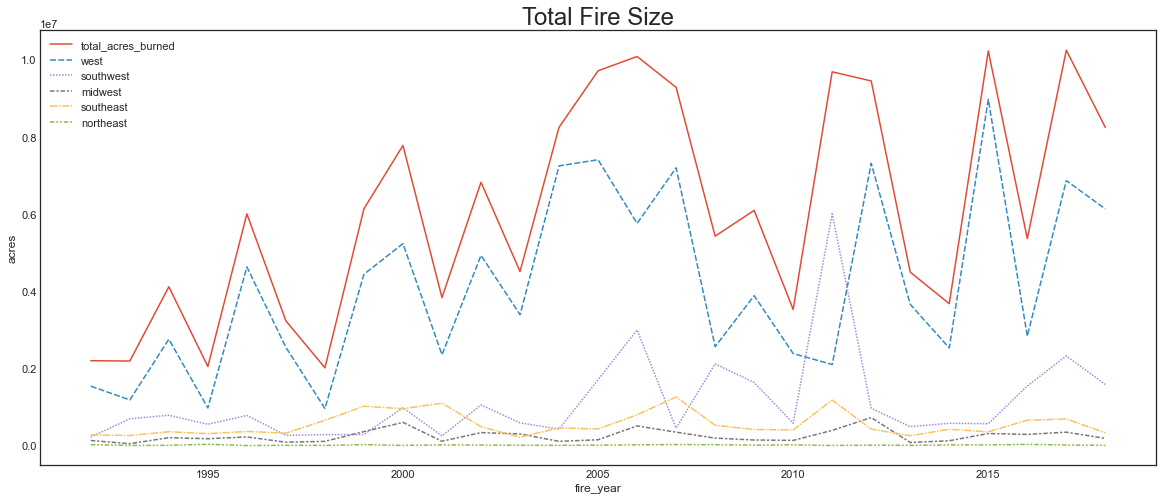

In [31]:
import explore as e
# plot total fire size data
plt.figure(figsize = (20,8))
sns.lineplot(data=e.fire_size_region(df)).set(title='Land Burned by Wildfires, 1992-2018', ylabel='acres')
plt.title('Total Fire Size', fontdict={'fontsize': 24});

#### The chart above shows that the majority of land burned in the U.S. was land in the western region. In 2011, though, the southwest region accounted for more land burned than the western region. The other three regions are fairly consistently low in comparison to the amount of land burned in the west and southwest regions.

### What about the total number of wildfires by region?

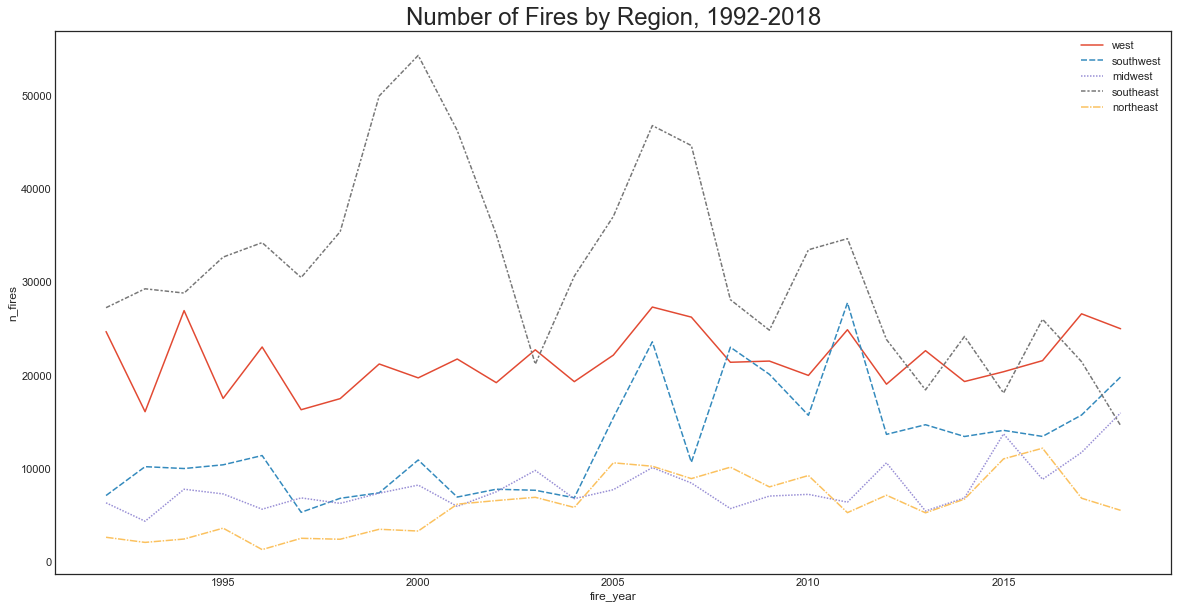

In [32]:
# plot fire occurrence data
plt.figure(figsize=(20,10))
sns.lineplot(data=e.num_region(df).drop(columns='total_fires')).set(title='Number of Fires by Region, 1992-2018', ylabel='n_fires')
plt.title('Number of Fires by Region, 1992-2018', fontdict={'fontsize': 24});


#### We can see in the chart above that the southeast region has the largest number of fires for most of the years in our dataset. This region does have a lot of variation in the number of fires. The western region is much more consistent in its number of fires, and it usually comes in second for the largest number of fires per year.

### The two charts below show the mean and median fire sizes by region for each year in our dataset:

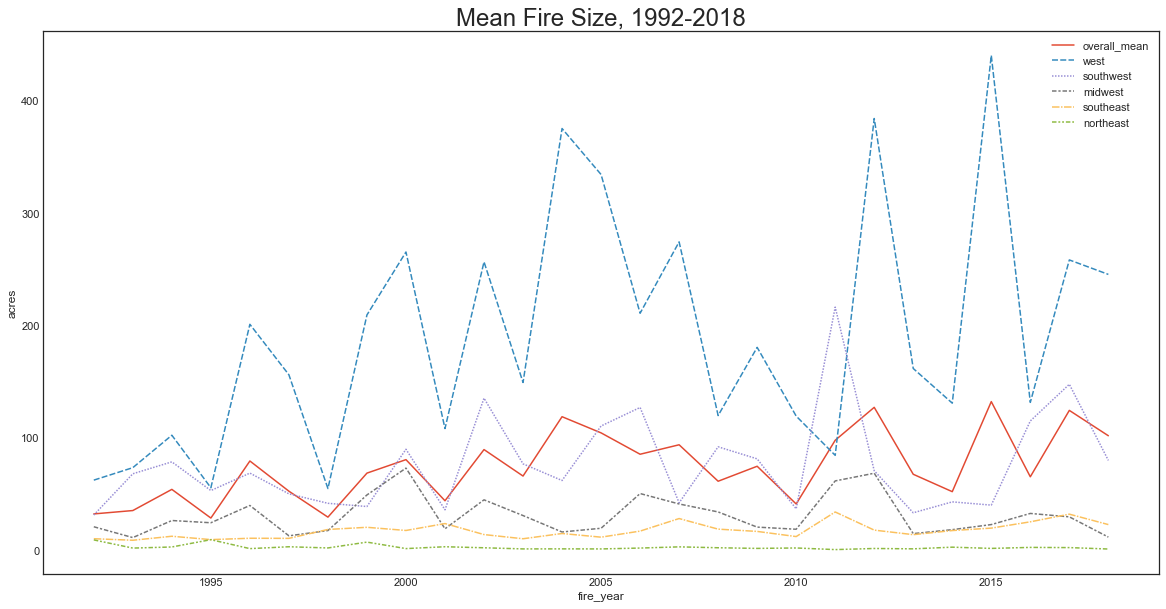

In [33]:
# plot mean data
plt.figure(figsize=(20,10))
sns.lineplot(data=e.mean_region(df)).set(title='Mean Fire Size, 1992-2018', ylabel='acres')
plt.title('Mean Fire Size, 1992-2018', fontdict={'fontsize': 24});


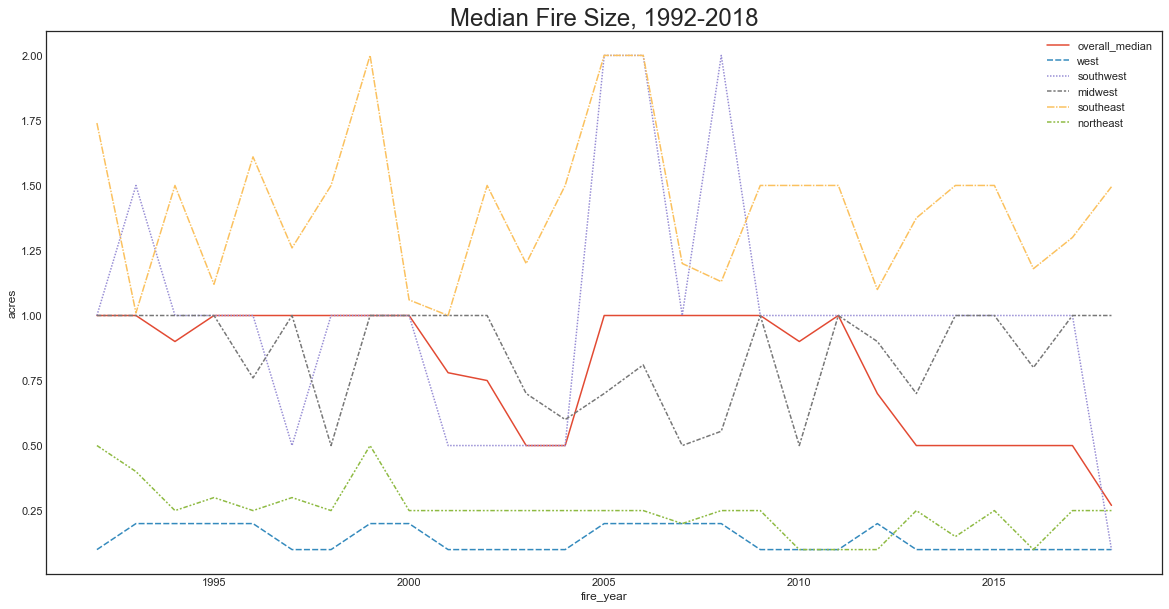

In [34]:
# plot median data
plt.figure(figsize=(20,10))
sns.lineplot(data=e.median_region(df)).set(title='Median Fire Size, 1992-2018', ylabel='acres')
plt.title('Median Fire Size, 1992-2018', fontdict={'fontsize': 24});


#### By comparing the mean and median fire values for each region, it becomes clear that most fires in the western region are small fires but some very large fires in that region cause the mean fire size to be very large and contribute to the large proportion of U.S. land that is burned each year by fires in the western region.

#### The southwestern region comes in second for both the highest mean and highest median fire size. There is a lot of consistency in the data for this region. 

---

## Wildfires By State

### What states have the highest risk of wildfires? Which have the least?

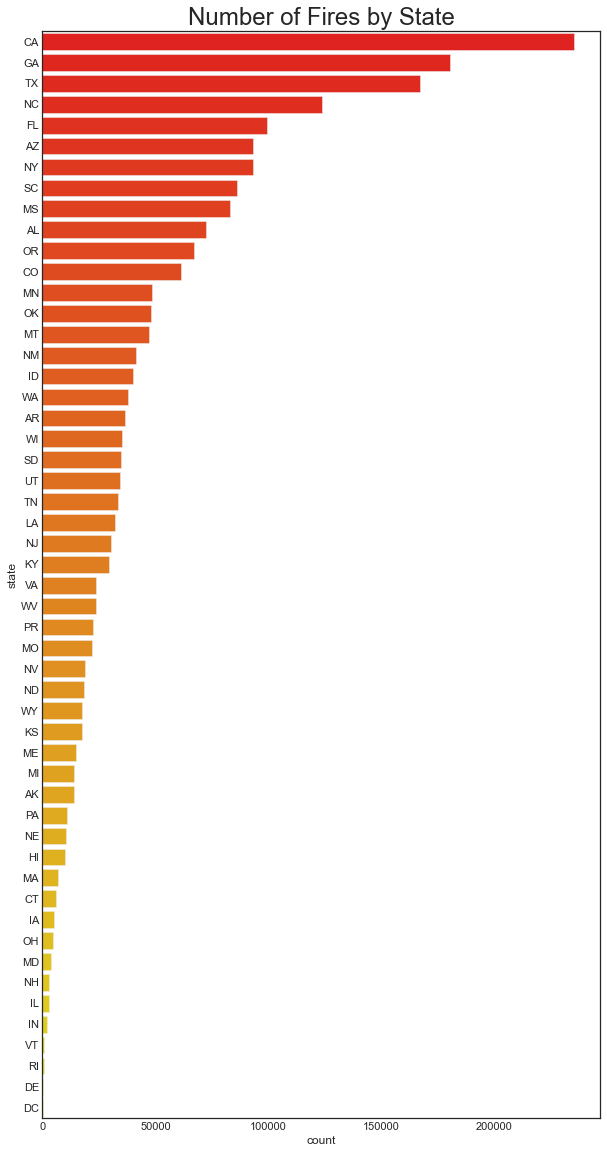

In [35]:
# plot number of fires by state
plt.figure(figsize=(10,20))
sns.countplot(data= df, y= 'state', order= df.state.value_counts().index, palette='autumn')
plt.title('Number of Fires by State', fontdict={'fontsize': 24});

#### Not surprisingly, this chart shows that California has the highest number of wildfires. It is followed by Georgia and Texas and many other southern states. The states with the least amount of wildfires seem to be primarily in the northeastern part of the U.S.

### Has the total number of wildfires in each of the top five states changed over the years?

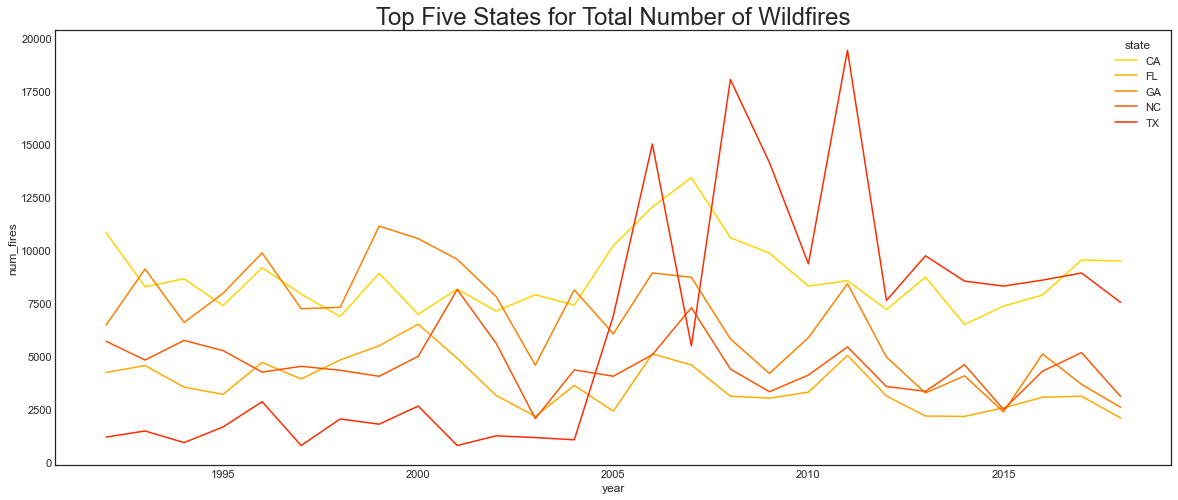

In [36]:
# Make a list of top five states for number of wildfires
top_five_wildfire_states = df.state.value_counts().head(5).index.to_list()

# Create the dataframe for the chart
num_fires_by_year = time_df[time_df.state.isin(top_five_wildfire_states)]\
.groupby(['fire_year', 'state']).count().reset_index()\
.iloc[:, 0:3].rename(columns={'general_cause':'num_fires', 'fire_year':'year'})

# Plot findings
plt.figure(figsize = (20,8))
sns.lineplot(data=num_fires_by_year, x='year', y='num_fires', hue='state', palette='autumn_r')
plt.title('Top Five States for Total Number of Wildfires', fontdict={'fontsize': 24});

#### The number of wildfires for the states with the most wildfires has been slightly decreasing for the last few years. Texas, in spite of this decrease for the last few years, has still seen quite the upward trend since 1992 with roughly three times as many fires in recent years than recorded in the early 1990s. Additionally, it had a few significant years for wildfires from 2005 - 2011.

### Which states have the largest wildfires?

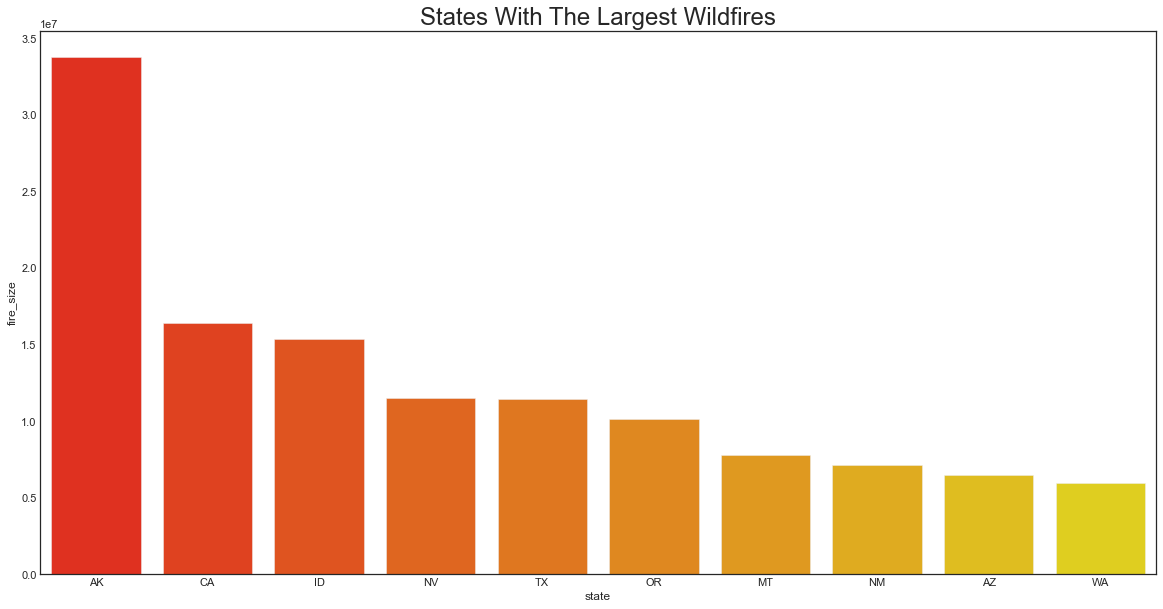

In [37]:
# create dataframe of states with the largest sum of area burned
states_with_largest_fires = df.groupby('state').fire_size.sum().sort_values(ascending=False).head(10).to_frame()

# plot data
plt.figure(figsize = (20,10))
sns.barplot(data=states_with_largest_fires, x=states_with_largest_fires.index, y='fire_size', palette='autumn')
plt.title('States With The Largest Wildfires', size=24);

#### It appears that a larger number of wildfires doesn't necessarily mean more area burned. AK is number one for total area burned but is very low on the list for number of wildfires. Similarly, GA is in the top five states for number of wildfires yet is not within the top 10 for total area burned. 

---

## Containment Time

### Were there any fires that took an excessive amount of time to contain?

In [38]:
# Dropping data that has nulls in containment_date
clean_df = df[df.containment_date.isnull() == False]

# Creating a column to see how many days before a fire was contained
clean_df['days_fire_existed'] = df.containment_date - df.discovery_date

# 2005 had fires that took much longer to contain. Idaho shows some fires lasting YEARS!
clean_df[(clean_df.discovery_date == '2005-08') & (clean_df.days_fire_existed > '365 days')]

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,day_of_week,days_fire_existed
2121478,2005,2005-08-01,Natural,2011-08-31,0.1,45.87571,-116.42853,ID,53487000.0,west,1.008831e+09,small,Monday,2221 days
2123309,2005,2005-08-01,Natural,2010-08-17,0.1,46.02525,-116.35458,ID,53487000.0,west,1.008831e+09,small,Monday,1842 days
2124091,2005,2005-08-01,Natural,2009-08-30,0.1,44.39039,-115.99127,ID,53487000.0,west,1.008831e+09,small,Monday,1490 days


#### While investigating a certain date, we found that there were some fires that lasted well over a year. It's difficult to say why these fires were considered uncontained for so long, and yet burned very little acres. There is a chance these Idaho fires represent the coal mines that caught on fire and were left to burn, however there is no way to prove that. 

---

## How do wildfires affect Texas specifically?

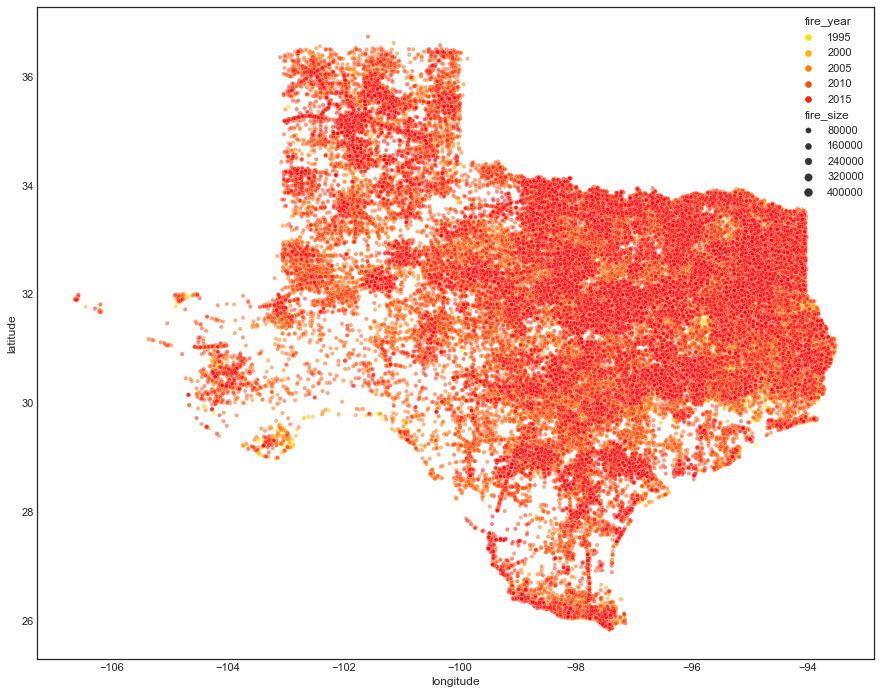

In [39]:
# # plot fires in Texas by size and year
plt.figure(figsize=(15,12))
sns.scatterplot(x='longitude', y='latitude', data=df[df.state=='TX'], size='fire_size', hue='fire_year', palette='autumn_r', alpha=0.5);
# # light to dark, oldest to newest

#### Taking a further look into the fires occurring in Texas, we can see fires occur throughout all regions of Texas and throughout all the years in our dataset. Fewer fires occur in the western part of Texas, which makes sense since that area is mostly desert. Most fires occur in Central and East Texas, where there is a lot of human activity and a lot of vegetation to be burned.

### Have TX wildfires increased in number over the years?

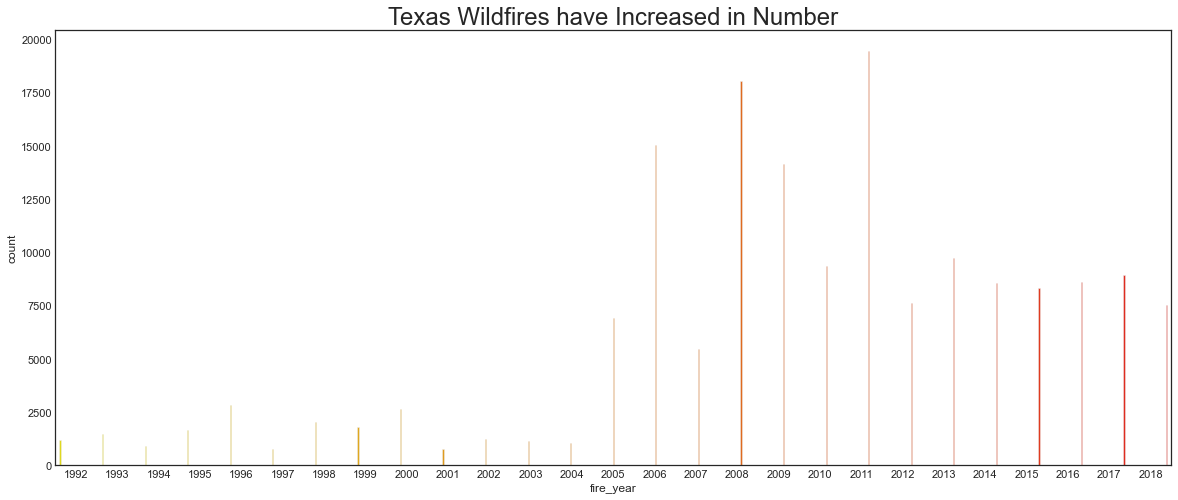

In [40]:
# Making a texas dataframe
texas = df[df.state == 'TX']

# Let's look at how many fires Texas has had over the years
plt.figure(figsize = (20,8))
sns.countplot(data= texas , x= 'fire_year', hue='fire_year', palette='autumn_r')
plt.legend([],[], frameon=False)
plt.title('Texas Wildfires have Increased in Number', fontdict={'fontsize': 24});

#### The chart above shows that the number of fires in Texas was clearly less before 2005. There is a significant increase in the fires between 2005 and 2011. After 2011, it seems the number of fires in a year decreases, but we don't see the smaller numbers as seen before 2005. The "new normal" of fires per year in Texas seems to be between 7,500 and 10,000. This could be a result of climate change but is a little suspicious. Further exploration indicated it could also just be due to a change in reporting wildfires.

### Has the total area burned in TX changed over the years?

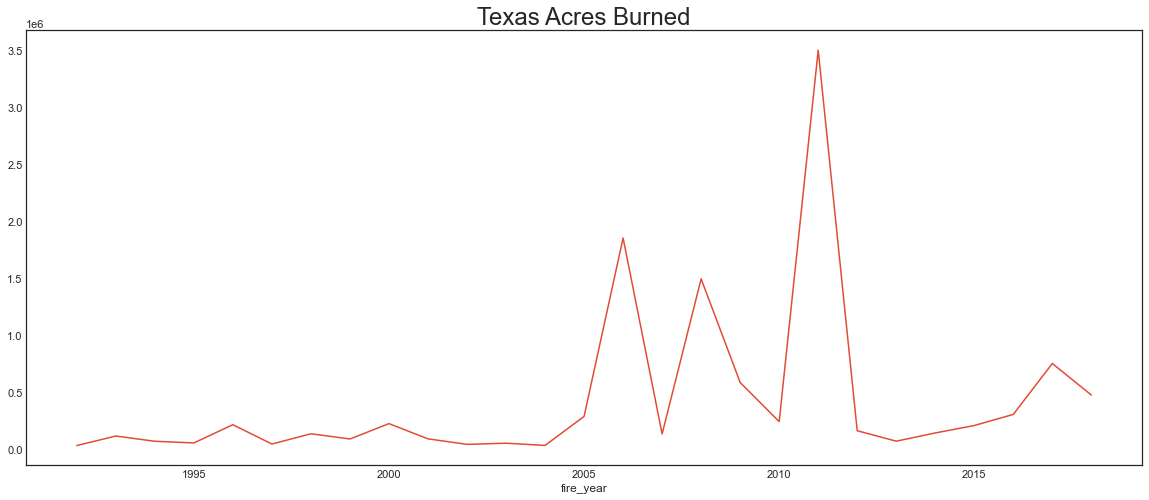

In [41]:
# plot total acres burned in Texas per year
plt.figure(figsize = (20,8))
texas.groupby('fire_year').fire_size.sum().plot()
plt.title('Texas Acres Burned', fontdict={'fontsize': 24});

#### This is another visualization for Texas fires, showing the number of acres burned. When compared with the visual above showing the number of fires, it's no surprise to see that the most acres burned was between 2005 and 2012. While the number of fires after 2012 is higher that the 1990's, this chart shows the acres burned is still averaging the same with only a slight increase. Perhaps this means a better response time by firemen? Despite the increase in number of fires, the acres burned seems to be managed. 

### Approximately, how long does it take to contain wildfires in TX?

In [42]:
# create new column
texas['days_uncontrolled'] = texas.containment_date - texas.discovery_date

# look at value counts for uncontrolled windows
texas.days_uncontrolled.value_counts().sort_index()

0 days      23623
1 days       2905
2 days        657
3 days        289
4 days        131
5 days         96
6 days         56
7 days         47
8 days         25
9 days         23
10 days        26
11 days        12
12 days        12
13 days        15
14 days        12
15 days         5
16 days         5
17 days         3
18 days         1
19 days         5
20 days         5
21 days         1
22 days         1
23 days         1
24 days         1
25 days         2
26 days         5
27 days         1
28 days         2
29 days         3
30 days         6
31 days         9
32 days         3
33 days         2
34 days         1
35 days         1
36 days         1
37 days         1
39 days         1
45 days         1
48 days         2
59 days         1
120 days        1
133 days        1
178 days        1
244 days        1
365 days       13
366 days        1
371 days        1
Name: days_uncontrolled, dtype: int64

#### The majority of fires in Texas were able to be contained the same day they were discovered. It is rare for Texas fires to remain uncontrolled for longer than two weeks, but it does occur occasionally. Interestingly, there were 13 fires that took exactly one year to contain. The longest uncontained fire in Texas lasted 371 days.

### What are the details of the largest fire in Texas and how does it compare to the largest fire in all of the United States?

In [44]:
# use max to get largest fire for the entire dataset
df[df.fire_size == df.fire_size.max()]

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,day_of_week
2042982,2017,2017-03-07,Missing data/not specified/undetermined,NaT,662700.0,36.77447,-100.1752,OK,44738000.0,southwest,366582000.0,large,Tuesday


In [48]:
# use max to get largest fire for TX
df[(df.state == 'TX') & (df.fire_size == df[(df.state == 'TX')].fire_size.max())]

,fire_year,discovery_date,general_cause,containment_date,fire_size,latitude,longitude,state,state_size,region,region_size,fire_size_cat,day_of_week
352695,2006,2006-03-12,Missing data/not specified/undetermined,2006-03-12,479549.0,35.6678,-101.3708,TX,171057000.0,southwest,366582000.0,large,Sunday


#### Takeaways from comparing the largest fires in US vs Texas:
- The largest US fire, land wise, was named the Starbuck fire, discovered on March 7th, 2017.  This fire was responsible for burning 662,700 acres across Oklahoma and Kansas. The cause of the fire is undetermined.
- The largest wildfire, by size, in Texas is the East Amarillo Complex fire, responsible for burning 479,549 acres.  This fire was discovered and contained on March 12, 2006 and was determined to be human caused.
- Both fires were discovered in the month of March.

---
# Conclusion
---

- Our goal was to see how US wildfires have changed over the years and promote active solutions to reduce their impact.

## Key Takeways

- Large wildfires are increasing in number and causing more destruction
- The western region of the U.S. has the most destruction from wildfires and the southeastern region has the largest number of wildfires.
- Most wildfires are caused by humans through debris and open burning and are preventable. 
- The number of wildfires has stayed pretty steady over the years but the amount of destruction caused by wildfires has increased and is continuing on an upward trend.


## Recommendations

- Limit open burning or implement safe procedures (avoid burning in dry areas), do not leave fires unattended and fully extinguish any outdoor fires
- Suggest fire departments widely share information on safe burning and alert local news stations on days when open burning should be avoided. 